In [8]:
import numpy as np
from phimal_utilities.analysis import load_tensorboard

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='paper', style='white')

In [96]:
df = load_tensorboard('runs/lstsq_correct/')
df_deepmod = load_tensorboard('runs/deepmod_correct/')

In [97]:
df.keys()

Index(['Total_loss', 'MSE_0', 'Regression_0', 'L1_0', 'coeff_0_0', 'coeff_0_1',
       'coeff_0_2', 'coeff_0_3', 'coeff_0_4', 'coeff_0_5', 'coeff_0_6',
       'coeff_0_7', 'coeff_0_8', 'coeff_0_9', 'coeff_0_10', 'coeff_0_11',
       'scaled_coeff_0_0', 'scaled_coeff_0_1', 'scaled_coeff_0_2',
       'scaled_coeff_0_3', 'scaled_coeff_0_4', 'scaled_coeff_0_5',
       'scaled_coeff_0_6', 'scaled_coeff_0_7', 'scaled_coeff_0_8',
       'scaled_coeff_0_9', 'scaled_coeff_0_10', 'scaled_coeff_0_11',
       'log_likelihood', 'll_fit', 'mae_library_0', 'mae_library_1',
       'mae_library_2', 'mae_library_3', 'mae_library_4', 'mae_library_5',
       'mae_library_6', 'mae_library_7', 'mae_library_8', 'mae_library_9',
       'mae_library_10', 'mae_library_11', 'mae_time_deriv'],
      dtype='object')

In [172]:
coeff_keys = [key for key in df.keys() if key[:5]=='coeff']
scaled_coeff_keys = [key for key in df.keys() if key[:6]=='scaled']
lst_keys = [key for key in df.keys() if key[:5]=='lstsq']
mae_keys = [key for key in df.keys() if key[:3]=='mae']

In [99]:
true_coeffs = np.zeros((1, 12))
true_coeffs[0, 2] = 2.0

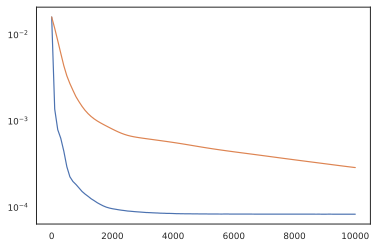

In [100]:
plt.semilogy(df.index, df['MSE_0'])
plt.semilogy(df_deepmod.index, df_deepmod['MSE_0'])

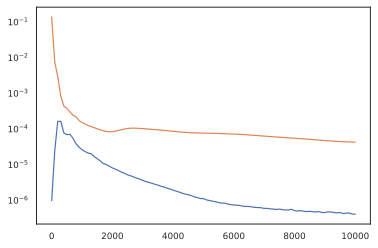

In [101]:
plt.semilogy(df.index, df['Regression_0'])
plt.semilogy(df_deepmod.index, df_deepmod['Regression_0'])

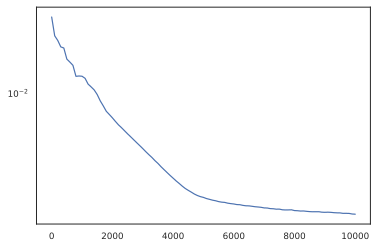

In [137]:
%config InlineBackend.figure_format = 'svg'
plt.semilogy(df.index, np.mean(df[mae_keys], axis=1))
#plt.semilogy(df_deepmod.index, np.mean(df_deepmod[mae_keys], axis=1))

(0, 20)

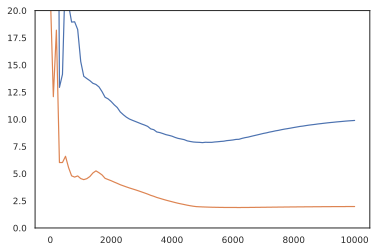

In [129]:
plt.plot(df.index, np.sum(np.abs(df[coeff_keys]), axis=1))
plt.plot(df.index, np.sum(np.abs(df[scaled_coeff_keys]), axis=1))

plt.ylim([0, 20])

(0.0, 20)

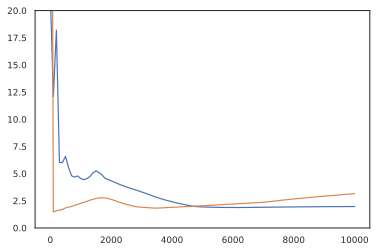

In [104]:
plt.plot(df.index, np.sum(np.abs(df[scaled_coeff_keys]), axis=1))
plt.plot(df_deepmod.index, np.sum(np.abs(df_deepmod[scaled_coeff_keys]), axis=1))
plt.ylim([0.0, 20])

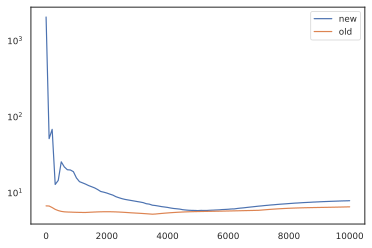

In [133]:
plt.semilogy(df.index, np.sum(np.abs(df[coeff_keys] - true_coeffs), axis=1), label='new')
plt.semilogy(df_deepmod.index, np.sum(np.abs(df_deepmod[coeff_keys] - true_coeffs), axis=1), label='old')

plt.legend()

In [155]:
np.mean(np.abs(df[coeff_keys[2]] - true_coeffs[0, 2][None]))

0.29282201634775296

In [165]:
scaled_coeff_keys

['scaled_coeff_0_0',
 'scaled_coeff_0_1',
 'scaled_coeff_0_3',
 'scaled_coeff_0_4',
 'scaled_coeff_0_5',
 'scaled_coeff_0_6',
 'scaled_coeff_0_7',
 'scaled_coeff_0_8',
 'scaled_coeff_0_9',
 'scaled_coeff_0_10',
 'scaled_coeff_0_11']

In [148]:
true_coeffs[:, 2:3].shape

(1, 1)

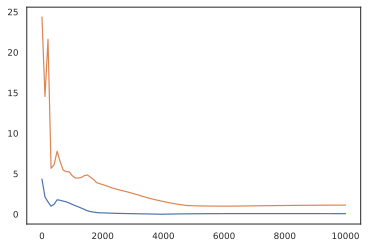

In [171]:
plt.plot(df.index, np.mean(np.abs(df[coeff_keys[2]] - true_coeffs[0, 2][None])[:, None], axis=1))
plt.plot(df.index, normed_l1, label='L1 norm')

In [177]:
normed_l1 = np.sum(np.abs(df[coeff_keys]), axis=1) / np.min(np.sum(np.abs(df[coeff_keys]), axis=1))
normed_l1_scaled = np.sum(np.abs(df[scaled_coeff_keys]), axis=1) / np.min(np.sum(np.abs(df[scaled_coeff_keys]), axis=1))
normed_coeff_error = np.mean(np.abs(df[coeff_keys] - true_coeffs), axis=1) / np.min(np.mean(np.abs(df[coeff_keys] - true_coeffs), axis=1))
normed_lib_error = np.mean(df[mae_keys], axis=1) / np.min(np.mean(df[mae_keys], axis=1).loc[1:])

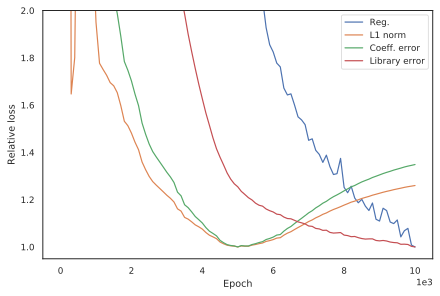

In [179]:
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True) #5.5 is official width

ax.plot(df.index, df['Regression_0']/df['Regression_0'].loc[1:].min(), label='Reg.')
ax.plot(df.index, normed_l1, label='L1 norm')
#ax.plot(df.index, normed_l1_scaled, label='L1 norm scaled')
ax.plot(df.index, normed_coeff_error, label='Coeff. error')
ax.plot(df.index, normed_lib_error, label='Library error')

ax.legend(loc='upper right')
ax.set_ylim([0.95, 2.0])
#ax.set_yscale('log')
#ax.set_title('Relative losses lst. sq')
ax.set_xlabel('Epoch')
ax.set_ylabel('Relative loss')
#ax.set_xlim([500, 10000])
#ax.text(-0.26, 1.01, 'C', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))
#ax.set_ylim([3e-4, 4e-4])


In [108]:
coeff_keys[2]

'coeff_0_2'

(-4, 10)

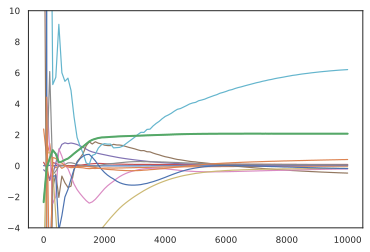

In [136]:
plt.plot(df.index, df[coeff_keys])
plt.plot(df.index, df[coeff_keys[2]], linewidth=2)
plt.ylim([-4, 10])

(-5, 5)

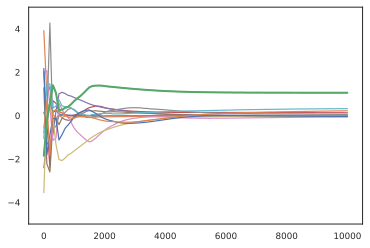

In [111]:
plt.plot(df.index, df[scaled_coeff_keys])
plt.plot(df.index, df[scaled_coeff_keys[2]], linewidth=2)
plt.ylim([-5, 5])

(-2, 2)

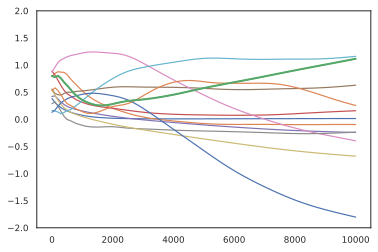

In [112]:
plt.plot(df_deepmod.index, df_deepmod[coeff_keys])
plt.plot(df_deepmod.index, df_deepmod[coeff_keys[2]], linewidth=2)
plt.ylim([-2, 2])

(-5, 5)

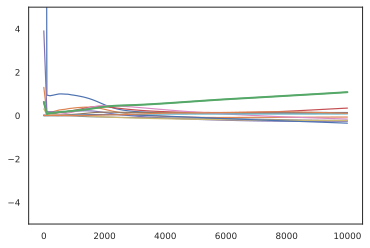

In [113]:
plt.plot(df_deepmod.index, df_deepmod[scaled_coeff_keys])
plt.plot(df_deepmod.index, df_deepmod[scaled_coeff_keys[2]], linewidth=2)
plt.ylim([-5, 5])

In [122]:
normed_l1 = np.sum(np.abs(df_deepmod[scaled_coeff_keys]), axis=1) / np.min(np.sum(np.abs(df_deepmod[scaled_coeff_keys]), axis=1))
normed_coeff_error = np.mean(np.abs(df_deepmod[coeff_keys] - true_coeffs), axis=1) / np.min(np.mean(np.abs(df_deepmod[coeff_keys] - true_coeffs), axis=1))
normed_lib_error = np.mean(df_deepmod[mae_keys], axis=1) / np.min(np.mean(df_deepmod[mae_keys], axis=1).loc[1:])


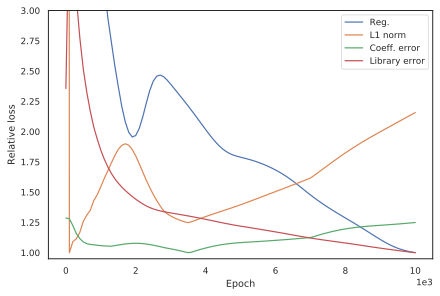

In [123]:
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True) #5.5 is official width

ax.plot(df.index, df_deepmod['Regression_0']/df_deepmod['Regression_0'].loc[1:].min(), label='Reg.')
ax.plot(df.index, normed_l1, label='L1 norm')
ax.plot(df.index, normed_coeff_error, label='Coeff. error')
ax.plot(df.index, normed_lib_error, label='Library error')

ax.legend(loc='upper right')
ax.set_ylim([0.95, 3.0])
#ax.set_yscale('log')
#ax.set_title('Relative losses lst. sq')
ax.set_xlabel('Epoch')
ax.set_ylabel('Relative loss')
#ax.set_xlim([500, 10000])
#ax.text(-0.26, 1.01, 'C', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))
#ax.set_ylim([3e-4, 4e-4])
